In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [4]:
# Load the dataset
df = pd .read_csv("Amazon Sales data.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
df.shape

(100, 14)

In [6]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [10]:
#round off columns Unit Price, Unit Cost, Total Revenue,  Total Cost, Total Profit and remove decimal

df[['Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]=df[['Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].round(0).astype(int)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255,159,2533654,1582244,951410
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,206,117,576783,328376,248406
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651,525,1158503,933904,224599
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9,7,75592,56066,19526
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651,525,3296425,2657348,639078


In [11]:
df["Total Profit"].mean()

441681.93

In [12]:
df["Total Profit"].median()

290768.0

In [13]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract day, month, year, and year_month from 'Order Date'
df["Day"] = df["Order Date"].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Year_Month'] = df['Order Date'].dt.to_period('M')

# Calculate Total Sales (assuming 'Total Revenue' is the sales column)
df['Total Sales'] = df['Total Revenue']


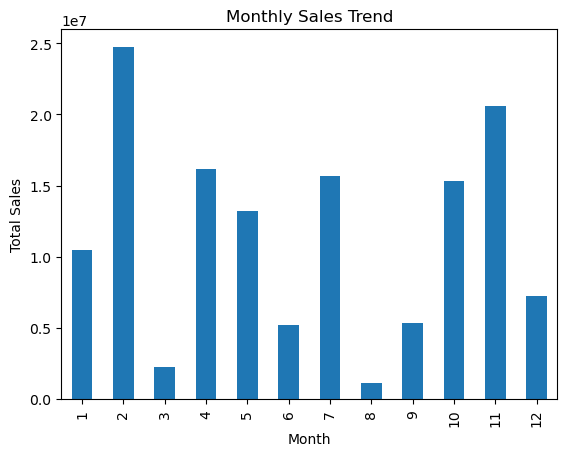

In [14]:
# Sales trend month-wise
monthly_sales = df.groupby('Month')['Total Sales'].sum()
monthly_sales.plot(kind='bar', xlabel='Month', ylabel='Total Sales', title='Monthly Sales Trend')
plt.show()

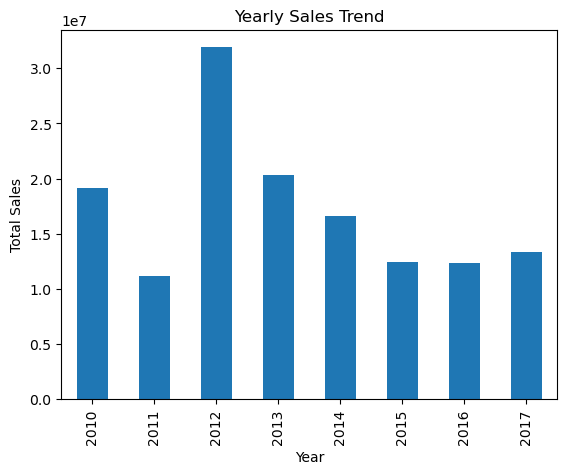

In [15]:
# Sales trend year-wise
yearly_sales = df.groupby('Year')['Total Sales'].sum()
yearly_sales.plot(kind='bar', xlabel='Year', ylabel='Total Sales', title='Yearly Sales Trend')
plt.show()

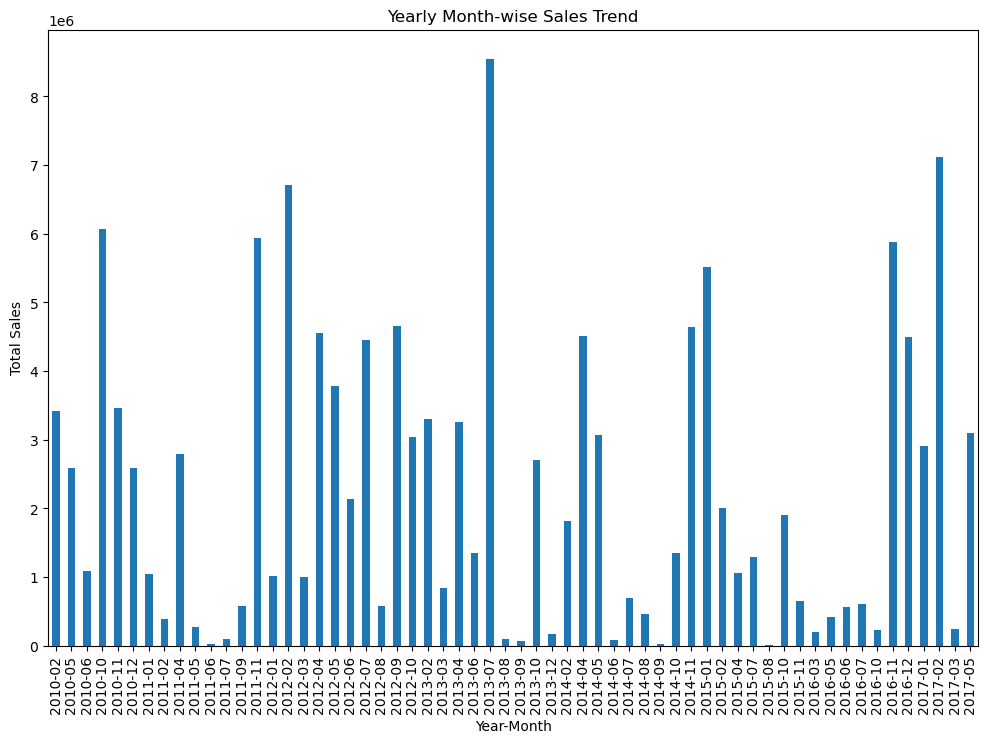

In [16]:
# Sales trend yearly_month-wise
plt.figure(figsize = (12,8))
yearly_monthly_sales = df.groupby('Year_Month')['Total Sales'].sum()
yearly_monthly_sales.plot(kind='bar', xlabel='Year-Month', ylabel='Total Sales', title='Yearly Month-wise Sales Trend')
plt.show()

<AxesSubplot:>

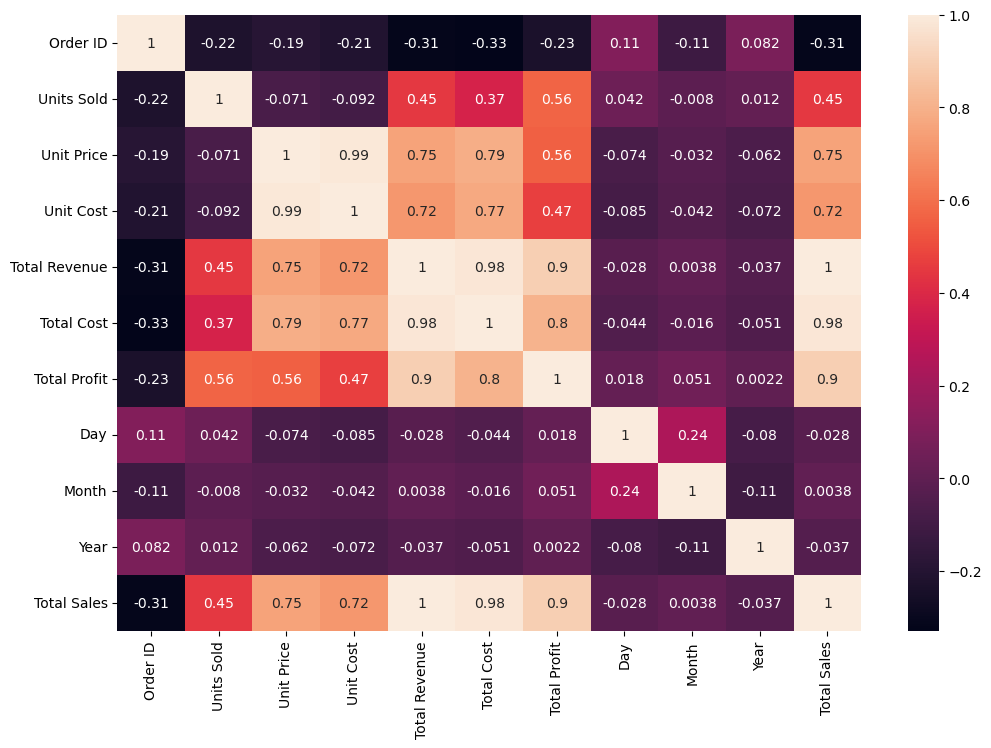

In [17]:
# HeatMap
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

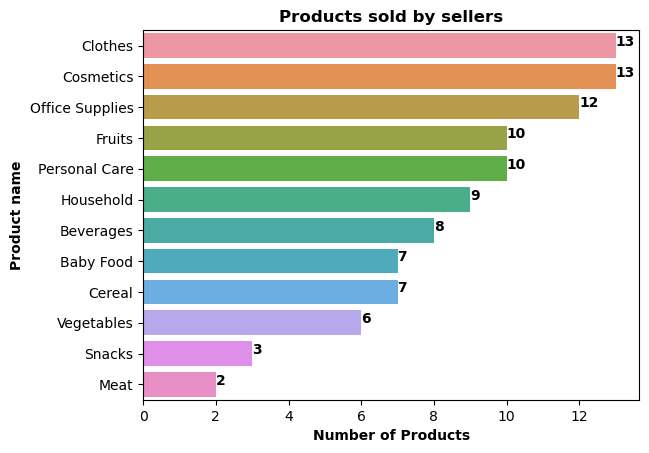

In [18]:
# Count the number of products sold by item type
products_sold = df['Item Type'].value_counts().rename_axis('Item Type').reset_index(name='count')

# Create a bar plot using Seaborn
sns.barplot(data=products_sold, x='count', y='Item Type')

# Adjust plot settings
plt.subplots_adjust(hspace=0.3)

# Set labels and title
plt.xlabel('Number of Products', fontweight='bold')
plt.ylabel('Product name', fontweight='bold')
plt.title('Products sold by sellers', fontweight='bold')

# Add labels to the bars
for index, value in enumerate(products_sold['count']):
    plt.text(value, index, str(value), fontweight='bold')

plt.show()

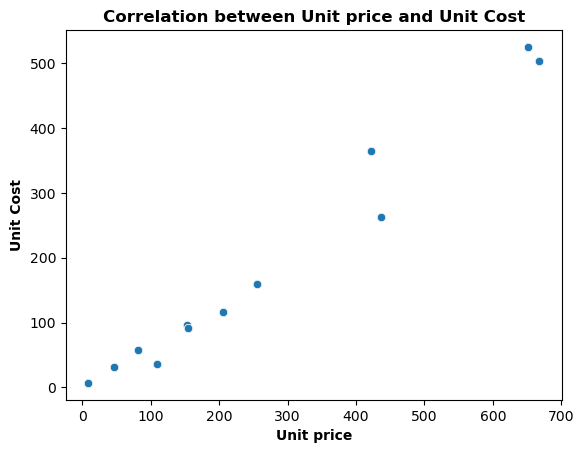

In [19]:
# plot a scatter plot for 'unit price' and 'unit cost'

sns.scatterplot(data = df, x='Unit Price', y='Unit Cost')
plt.title('Correlation between Unit price and Unit Cost', fontweight = 'bold')
plt.xlabel('Unit price', fontweight = 'bold')
plt.ylabel('Unit Cost', fontweight = 'bold')
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Total Cost'>

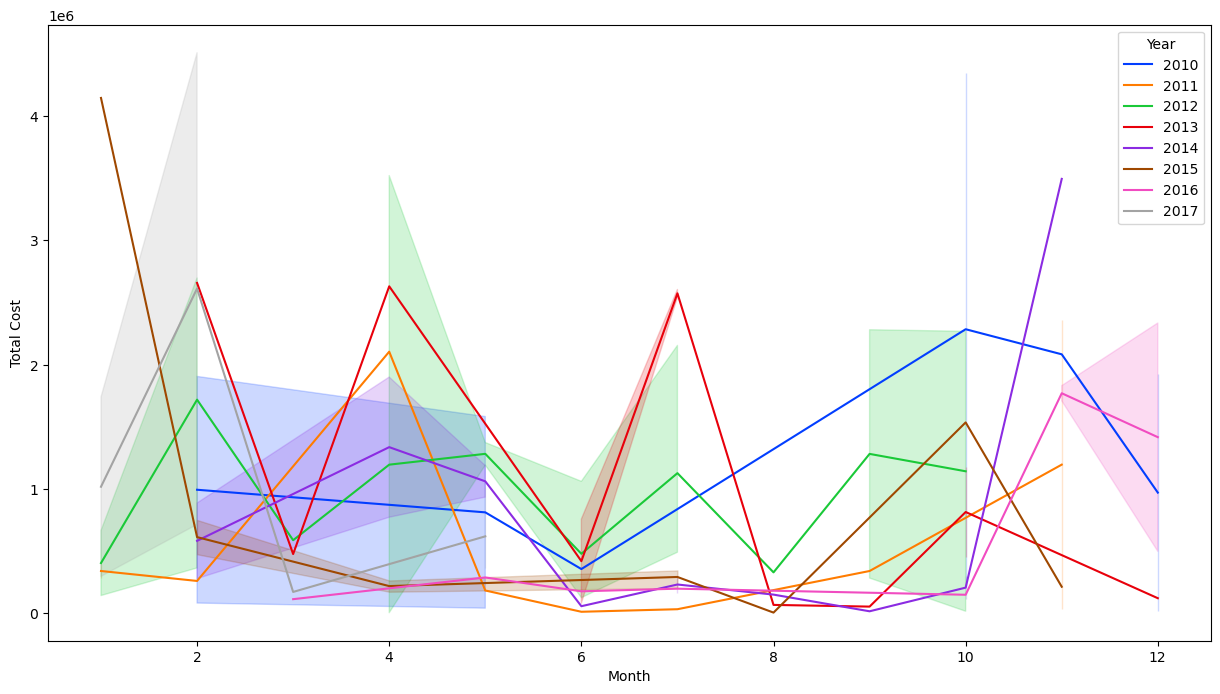

In [20]:
# plot a line plot for total cost.

plt.figure(figsize = (15,8))
sns.lineplot(y = "Total Cost", x = "Month", data = df.groupby(["Day", "Month", "Year"]).sum(),hue = "Year", palette = "bright")

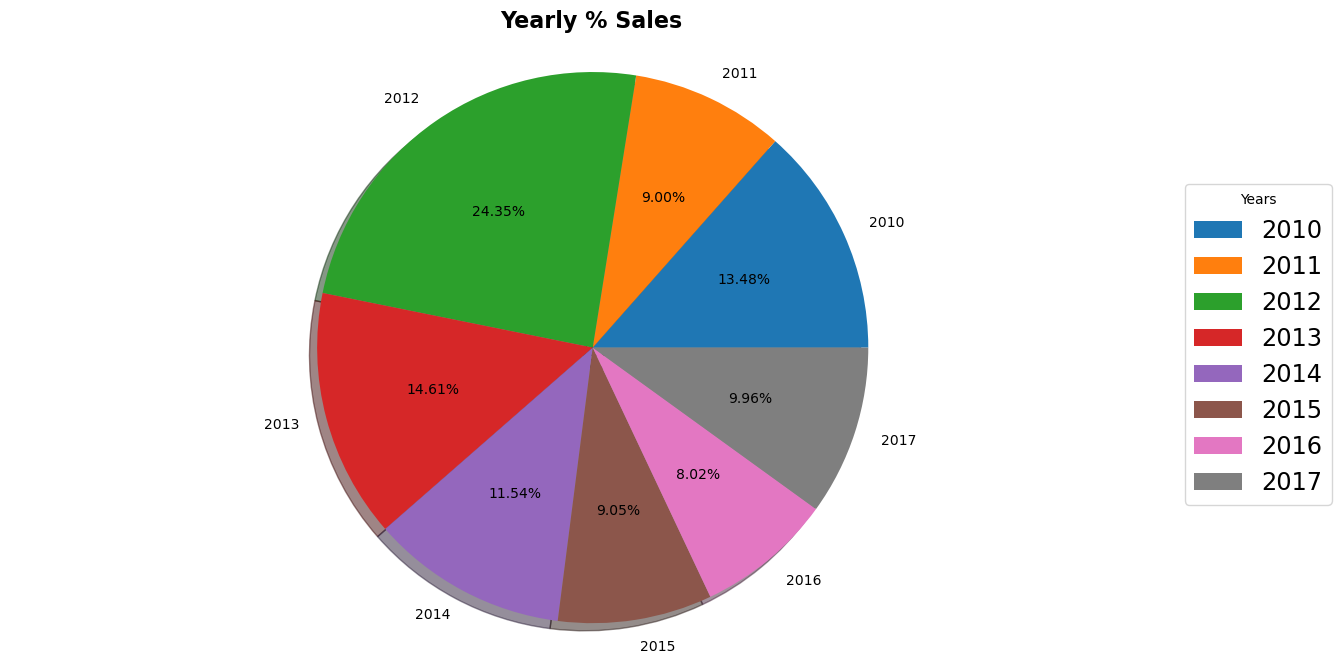

In [21]:
# plot piechart to know yearly Sales.

yearly_sales = df.groupby("Year").sum().reset_index()
plt.figure(figsize=(15, 8))
total_cost_data = yearly_sales['Total Cost']
years = yearly_sales['Year']
plt.pie(total_cost_data, labels=years, shadow=True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Yearly % Sales", fontweight='bold', fontsize=16)
plt.legend(labels=years, loc='center left', bbox_to_anchor=(1, 0.5), fontsize="xx-large", title="Years")
plt.show()

,Year,Total Profit
0,2010,6629567
1,2011,2741008
2,2012,9213008
3,2013,6715418
4,2014,5879462
5,2015,3996539
6,2016,4903837
7,2017,4089354


<Figure size 1000x600 with 0 Axes>

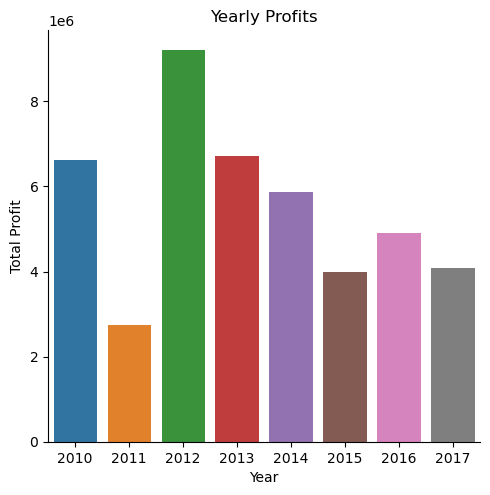

In [22]:
# plot bar graph to show yearly profits.

plt.figure(figsize=(10, 6))
sns.catplot(y = "Total Profit", x = "Year", data = yearly_sales, kind = "bar")
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Yearly Profits")
yearly_sales[["Year", "Total Profit"]]


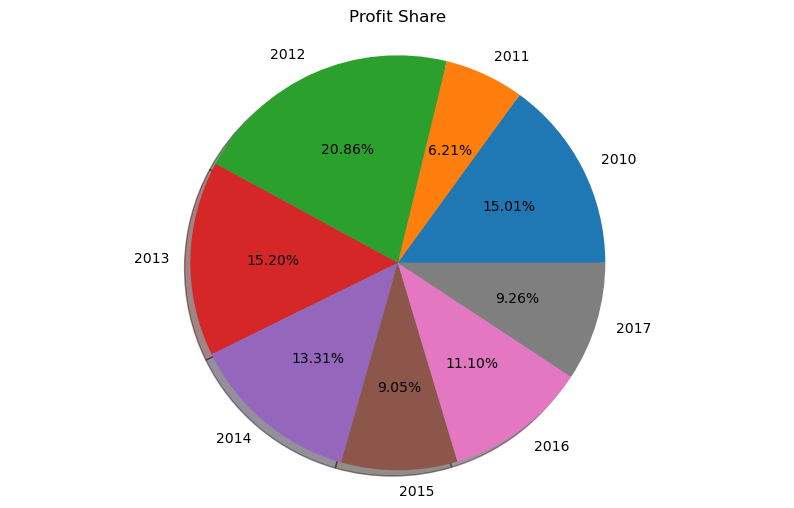

In [23]:
# plot a piechart to show profit share in each year.

plt.figure(figsize=(10, 6))
plt.pie("Total Profit", labels = "Year", data = yearly_sales[["Year", "Total Profit"]], shadow=True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Profit Share")
plt.show()

In [24]:
# Collect the top items data for each year
top_items_data = []

# Loop through each year and collect the data
for year in range(2010, 2018):
    top_items_year = df[df["Year"] == year].groupby(["Year", "Item Type"]).sum()
    top_items_year = top_items_year.sort_values("Total Profit", ascending=False).reset_index()
    top_items_data.append(top_items_year[['Item Type', 'Total Profit']])

# Print the top items dataframes separately
for i, year in enumerate(range(2010, 2018)):
    print(f"Top items data for {year}:\n{top_items_data[i]}\n" + "="*50 + "\n")


Top items data for 2010:
         Item Type  Total Profit
0        Cosmetics       2633088
1          Clothes       1343217
2  Office Supplies       1046234
3        Baby Food        951410
4        Household        634746
5           Fruits         14031
6    Personal Care          6841

Top items data for 2011:
         Item Type  Total Profit
0  Office Supplies       1133094
1        Household        693912
2        Beverages        355889
3       Vegetables        243429
4           Snacks        225247
5          Clothes         65215
6           Fruits         24222

Top items data for 2012:
         Item Type  Total Profit
0        Household       2076928
1  Office Supplies       1765227
2        Cosmetics       1505888
3          Clothes        957584
4       Vegetables        928642
5        Baby Food        825738
6           Cereal        435951
7    Personal Care        377854
8             Meat        337938
9           Fruits          1258

Top items data for 2013:
      

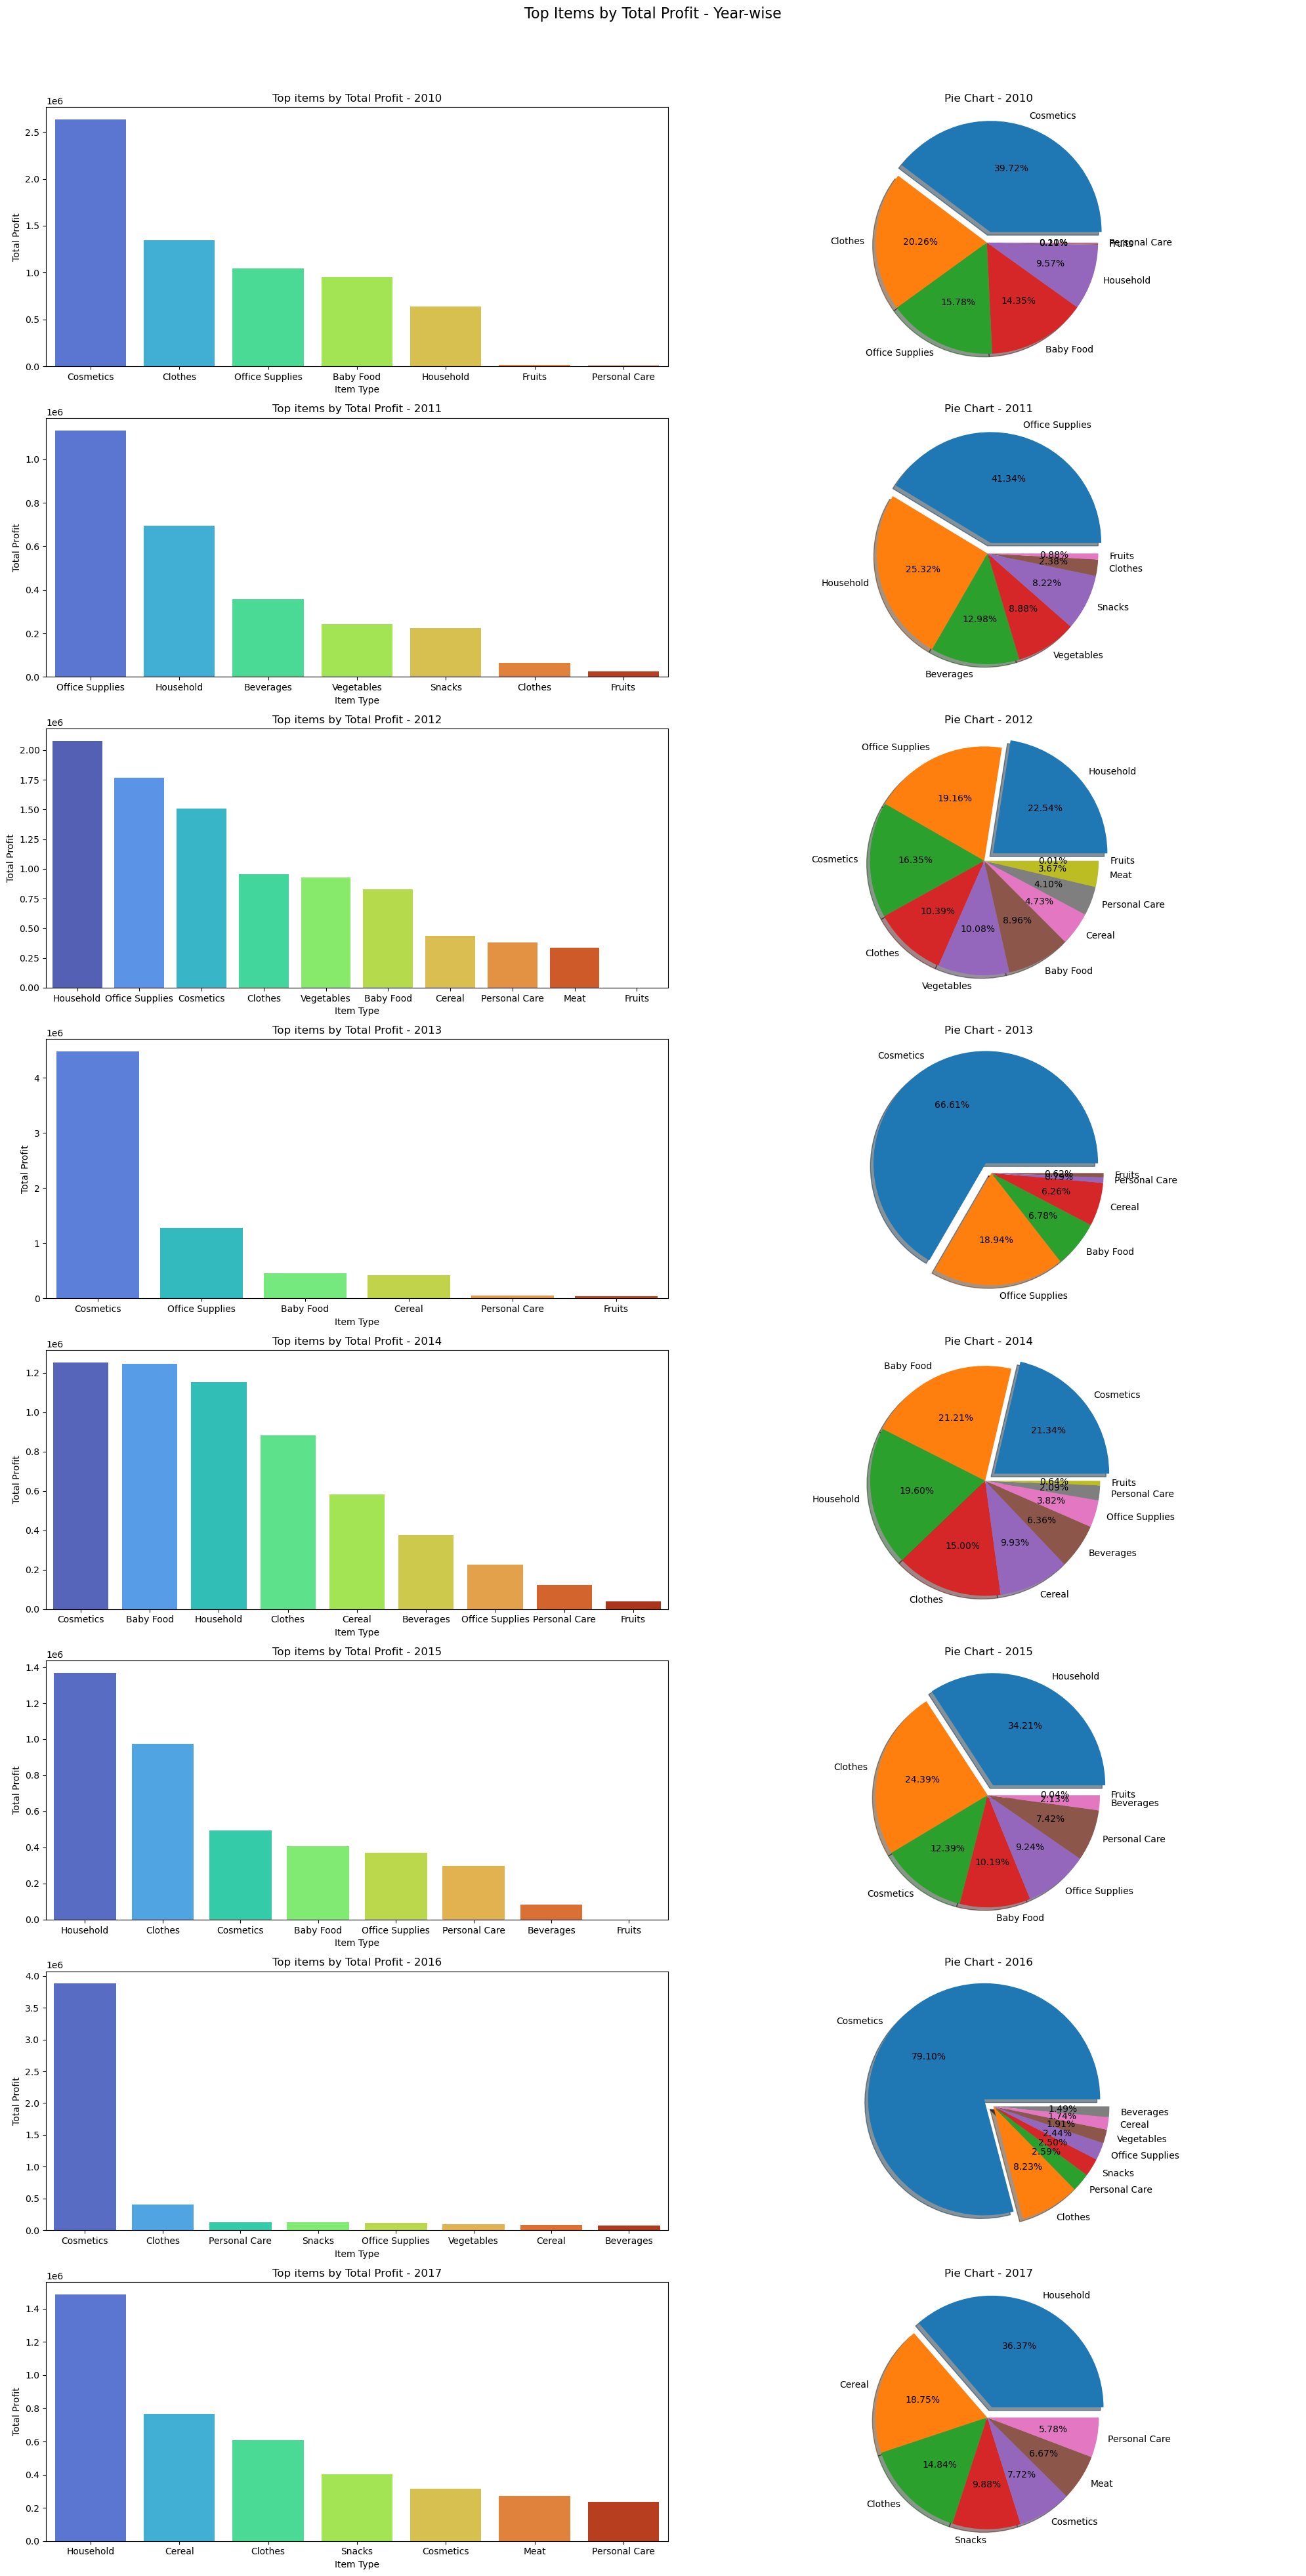

In [25]:
# Function to create bar plot and pie chart for each year
def plot_yearly_data(ax, year, top_items):
    # Create bar plot
    sns.barplot(x="Item Type", y="Total Profit", data=top_items, palette="turbo", order=top_items["Item Type"], ax=ax[0])
    ax[0].set_title(f"Top items by Total Profit - {year}")

    # Create pie chart on the right side
    explode = tuple(0.1 if i == 0 else 0 for i in range(len(top_items)))
    ax[1].pie(top_items["Total Profit"], labels=top_items["Item Type"], shadow=True, autopct="%1.2f%%", explode=explode)
    ax[1].axis("equal")
    ax[1].set_title(f"Pie Chart - {year}")

# Create a 8x2 grid of subplots (2 columns for each row)
fig, axes = plt.subplots(8, 2, figsize=(20, 40))
fig.suptitle("Top Items by Total Profit - Year-wise", fontsize=16)

# Loop through each year and plot the data
for i, year in enumerate(range(2010, 2018)):
    top_items_year = df[df["Year"] == year].groupby(["Year", "Item Type"]).sum()
    top_items_year = top_items_year.sort_values("Total Profit", ascending=False).reset_index()

    # Each row has two subplots, one for bar graph and one for pie chart
    plot_yearly_data(axes[i], year, top_items_year)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()


In [27]:
# export cleaned csv file

#df.to_csv('Amazon_Sales_cleaned_data.csv', index=False)